# TVVL Cursus | Intro Python | Deel 1
Middels het gebruik van een dataset over de Titanic worden een aantal basisfunctionaliteiten van de Python Libary Panda's toegelicht.

## Python Libary Imports
We beginnen met het importeren van de benodigde Python Libaries. Voor deze intro is dat enkel de Panda's Libary

In [1]:
# Importeren Pandas Libary
import pandas as pd

## Lees Excel bestand en verken dataset
Middels het gebruik van de 'read_excel' lezen we de inhoud van de excel file uit en brengen dit naar een DataFrame. Officiele documentatie over de 'read_excel' functie is te vinden via https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [2]:
titanic_df = pd.read_excel("titanic_data.xls","titanic3",index_col=None,na_values=["NA"])

Vervolgens controleren we de eigenschappen van de ingelezen data middels de 'info()' functionaliteit. Hierbij krijg je informatie over de hoeveelheid datapunten per kolom en de specieke datatypes die de dataset bevat.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


De ingelezen Excel file heeft in totaal 14 kolommen. Middels de functie 'head()' krijgen we een snapshot van hoe de data er per kolom uitziet.

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We kunnen waarnemen dat de dataset zowel nummers als tekst bevat. Daarnaast zien we ook dat voor sommige waardes 'NAN' staat aangegeven. Dit beteken 'not a number', dus dat de data onbekend is. Om uiteindelijk inzicht te krijgen in hoeveel 'NaN' waardes kan gebruik worden gemaakt van de functie 'isnull()' in combinatie met 'sum()' 

In [5]:
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Data bewerking
Nu de dataset is ingelezen en we weten waar we mee te maken hebben, kunnen we kijken of we wat vragen beantwoord kunnen krijgen vanuit de data. Om wat eerste algemene statestieken te verkrijgen, kunnen beginnen met de functie 'describe()'

In [6]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Vanuit de functie 'describe()' krijgen we per kolom statestieken over bijvoorbeeld de 'min', 'max' en 'mean'. Officiele documentatie over de 'describe()' functie is te vinden via https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

## Bewerken van dataset
Afhankelijk van de analyse die we willen uitvoeren, kan het zo zijn dat een dataset eerst bewerkt moet worden. Voor deze dataset gaan we geen gebruik maken van een aantal kolommen. Middels de 'drop' functie kunnen we aangeven welke kolommen we willen verwijderen.

In [7]:
titanic_df.drop(["ticket","cabin","boat","body"],axis=1).head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


## Wat eerste statistieken
Vanuit de dataset die we nu hebben willen we een aantal statestieken naar voren halen. We beginnen met het tellen van de hoeveelheid mensen die zijn overleden tijdens de ramp. De kolom 'survived' geeft een overlevende aan met '1' en een niet overlevende met '0'. Om het aantal mensen te bepalen die het hebben overleeft, moeten we het aantal '1' waardes en aantal '0' waardes opstellen. Dit kan middels de functie 'value_counts'. De uitkomst van deze optelling wordt opgeslagen in de variable 'people_survived'.

In [8]:
people_survived = pd.value_counts(titanic_df["survived"])
print(people_survived)

0    809
1    500
Name: survived, dtype: int64


Vervolgens willen we dit inzicht plotten in een 'barplot'.Pandas heeft ingebouwde 'matplotlib' functionaliteiten, waardoor snel een plot kan worden gecreërd. Door achter de 'value_counts' functie 'plot()' te plaatsen wordt er een standaard 'lineplot' gevisualiseerd. Wanneer daar 'plot.bar()' van wordt gemaakt krijgen we een 'barplot' terug.

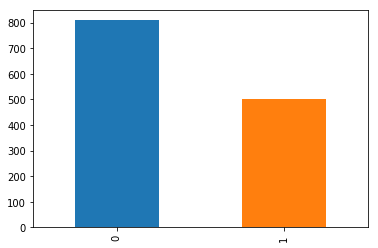

In [10]:
people_survived.plot.bar()

Van de 1309 geregistreerde reizigers in deze dataset, hebben uiteindelijk 900 mensen de ramp niet overleefd. Vanuit deze gegevens kan een gemiddelde worden berekend van het aantal mensen die het wel hebben overleefd. Dit kan door gebruik te maken van de 'mean()' functie.

In [11]:
titanic_df["survived"].mean()

0.3819709702062643

# Analyse & resultaten
Nu we weten wat voor data we voor handen hebben, kunnen we beginnen met analyseren en het creëren van resultaten.

## Groeperen van data
De veiligheidsprocedure bij het verlaten van een zinkend schip is dat vrouwen en kinderen voorrang hebben op volwassen mannen. Door gebruik te maken van de 'groupby()' functie wordt voor elke unieke waarde in een kolom de statistiek weergegeven. Voor nu willen wij per geslacht weten wat de gemiddelds waren per kolom.

In [12]:
titanic_df.groupby(["sex"]).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


Afhankelijk van welke klasse je reisde werd tevens voorrang verleend om plaats te nemen in een reddingsboot. Interresant is om te kijken naar de data per geslacht, onderverdeeld per klasse die men reisde.

In [13]:
titanic_df.groupby(["sex","pclass"]).mean()

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

## Filteren van data
Het percentage van een vrouw ligt aanmerkelijk hoger dan dat van een man. Het lijkt er dan ook op dat vrouwen voorrang kregen op een plaats in een reddingsboot. Om te controlleren of kinderen voorrang kregen, filteren we de dataset op 'age' onder de 18 jaar.

In [14]:
titanic_df[titanic_df["age"]<18].groupby(["sex"]).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.527778,0.694444,9.015047,1.152778,1.055556,30.246065,328.0
male,2.646341,0.378049,9.177845,1.597561,1.060976,32.746037,65.5


Het percentage voor vrouwen onder de 18 jaar ligt lager dan over de gehele dataset. Voor mannen onder de 18 jaar is het gemiddelde percentage wel hoger dan over de gehele dataset. Om te controlleren of de klasse van reizen ook invloed heeft op kinderen, groeperen we de dataset op geslacht en klasse.

In [15]:
titanic_df[titanic_df["age"]<18].groupby(["sex","pclass"]).mean()

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

# Conclusie & aanbevelingen
In deze sectie gaan kunnen de conclusies uit de data analyse worden neergezet. In het kort kunnen we concluderen dat zowel het geslacht, leeftijd als klasse van reizen invloed heeft op de overlevingskans. Qua aanbevelingen is het wenselijk om het aantal mensen bij de gemiddelde percentages nog in oogschouw te nemen.